In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_excel("Files/iris_data.xlsx")

In [14]:
df 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
X = df.drop(columns="species")
y = df['species']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=32)

In [18]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=32)

In [19]:
y_pred = rf.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica'], dtype=object)

In [20]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.98
[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


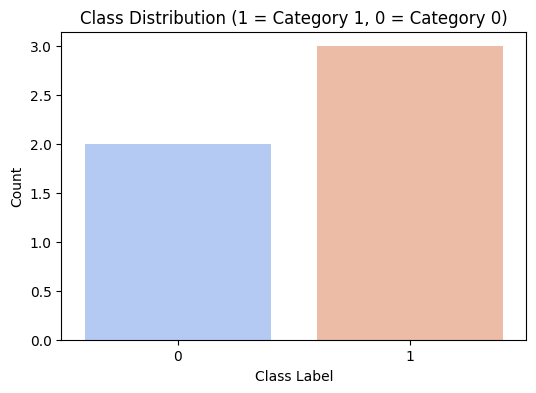

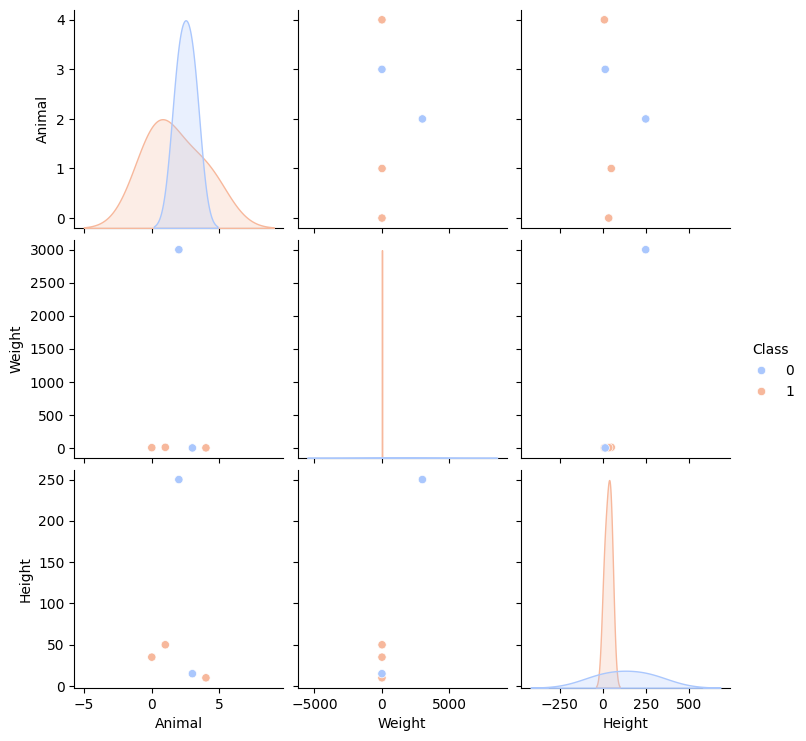

Accuracy: 1.00
The animal is in Class 0


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Given dataset
data = {
    "Animal": ["Dog", "Cat", "Elephant", "Tiger", "Rabbit"],
    "Weight": [10, 5, 3000, 2, 1],  
    "Height": [50, 35, 250, 10, 15],
    "Class": [1, 1, 0, 1, 0] 
}

df = pd.DataFrame(data)


label_encoder = LabelEncoder()
df["Animal"] = label_encoder.fit_transform(df["Animal"])


plt.figure(figsize=(6, 4))
sns.countplot(x=df["Class"], palette="coolwarm")
plt.title("Class Distribution (1 = Category 1, 0 = Category 0)")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


sns.pairplot(df, hue="Class", palette="coolwarm")
plt.show()

# Split data
X = df[["Animal", "Weight", "Height"]]
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

new_animal = ["Elephant"]
new_weight = 3000
new_height = 250
new_animal_encoded = label_encoder.transform(new_animal)[0]
new_data = np.array([[new_animal_encoded, new_weight, new_height]])
prediction = model.predict(new_data)

print(f"The animal is in Class {prediction[0]}")

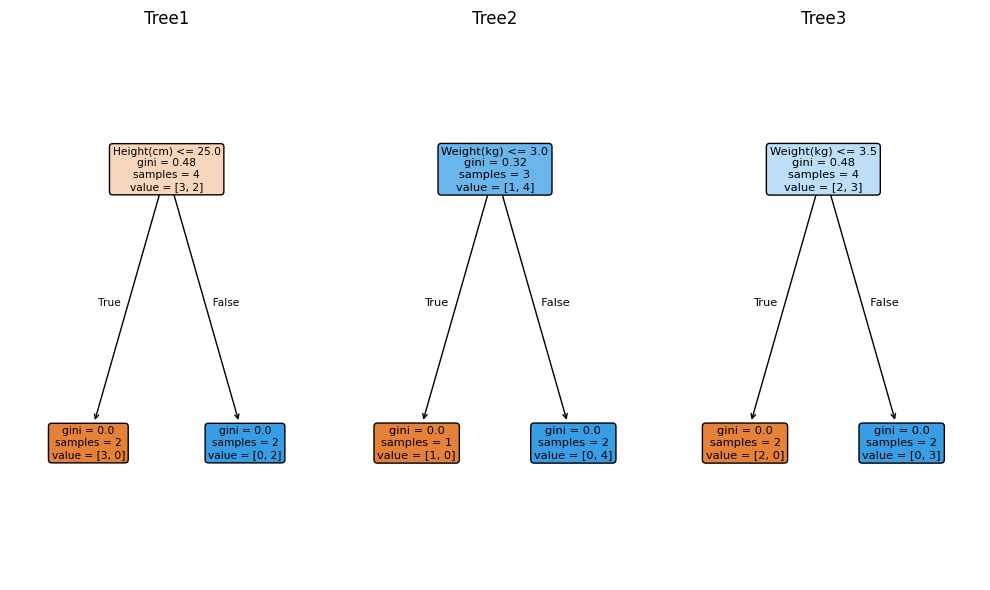

In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

data = {"Animal":["Dog","Cat","Lizard","Elephant","Snake"],
        "Weight(kg)":[10,5,1,3000,2],
        "Height(cm)":[50,35,15,250,10],
        "class":[1,1,0,1,0]}

df = pd.DataFrame(data)
x = df[["Weight(kg)","Height(cm)"]]
y = df["class"]
rf = RandomForestClassifier(n_estimators=3,random_state=42)
rf.fit(x,y)
plt.figure(figsize=(10,6))
for i in range(3):
    plt.subplot(1,3,i+1)
    plot_tree(rf.estimators_[i],feature_names=["Weight(kg)","Height(cm)"],filled=True,rounded=True)
    plt.title(f"Tree{i+1}")
plt.tight_layout()
plt.show()

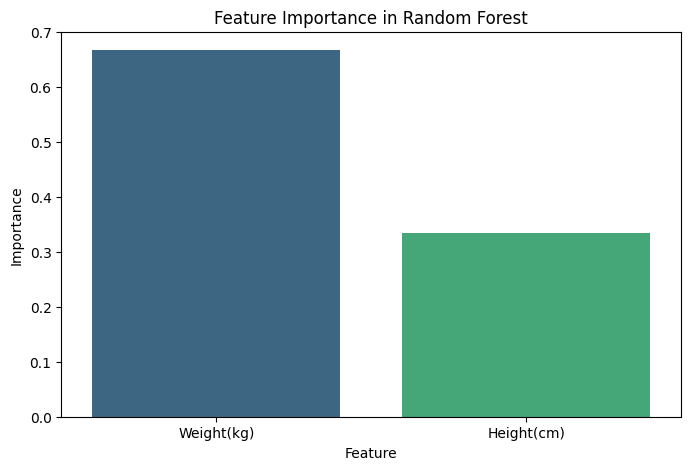

In [24]:
# Extract feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame for visualization
feat_importance_df = pd.DataFrame({'Feature': ["Weight(kg)", "Height(cm)"], 'Importance': feature_importance})


plt.figure(figsize=(8,5))
sns.barplot(x='Feature', y='Importance', data=feat_importance_df, palette='viridis')
plt.title("Feature Importance in Random Forest")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()
